# The Built-in Datasets and the Sequential API

In this module, we will

1. Learn about Toy Datasets available in the Keras Datasets library 
2. Build a FeedForward Model using the Sequential API
3. Evaluate and Predict Unknown Images

In [1]:
# imports 
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


## Exploring the Dataset

In this module, we are using the famous MINST digit dataset; however, the keras datasets library contains other [datasets](https://keras.io/api/datasets/) as well. You are advised to explore them and learn using them.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Let's explore the dataset**

In [3]:
num_x_train = x_train.shape[0]
x_train_dim = x_train.shape[1:]

num_x_test = x_test.shape[0]
x_test_dim = x_train.shape[1:]

print('There are {} train images of size : {}.\n'.format(num_x_train, x_train_dim))
print('There are {} test images of size : {}.\n'.format(num_x_test, x_test_dim))

There are 60000 train images of size : (28, 28).

There are 10000 test images of size : (28, 28).



**Let's view some of the images**

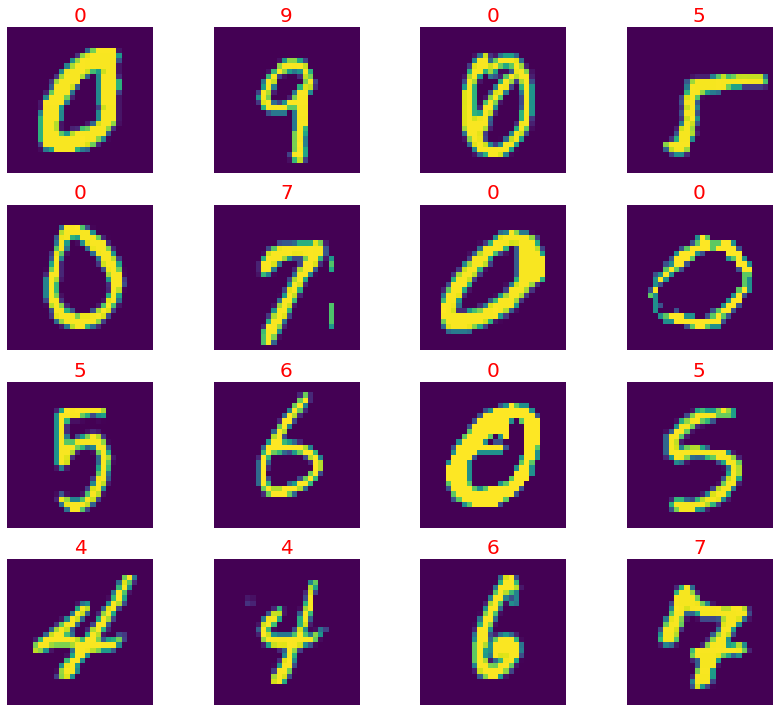

In [4]:
import matplotlib.pyplot as plt

np.random.seed(1)
indices = np.random.randint(0, 60000, size = 16)
plt.figure(figsize = (12, 10))
for i, index in enumerate(indices):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[index,:])
  plt.title(y_train[index], fontsize= 20, color= "red")
  plt.axis('off')
  
plt.tight_layout()

***
The above images are of sizes $(28, 28)$; whereas, the nerual network models we have learnt so far required flat inputs. Therefore, first, we will convert each image of size $(28, 28)$ into arrays of dimensions $(1, 784)$.
***

## Build a Sequential Model

In [5]:
model = Sequential(name = 'Sequential-Model')

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(units = 64, activation= tf.nn.relu,  name = 'Layer-1'))
model.add(Dense(units = 32, activation=tf.nn.relu, name = 'Layer-2'))
model.add(Dense(units = 10, activation = tf.nn.softmax, name = 'Output-Layer'))
print(model.summary())

Model: "Sequential-Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Layer-1 (Dense)              (None, 64)                50240     
_________________________________________________________________
Layer-2 (Dense)              (None, 32)                2080      
_________________________________________________________________
Output-Layer (Dense)         (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
None


**Compiling the Model:**

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

**Training the Model:**

In [7]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3892 - accuracy: 0.7559 - val_loss: 0.5757 - val_accuracy: 0.8850
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4402 - accuracy: 0.8953 - val_loss: 0.3625 - val_accuracy: 0.9183
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2910 - accuracy: 0.9298 - val_loss: 0.2619 - val_accuracy: 0.9410
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2156 - accuracy: 0.9457 - val_loss: 0.2175 - val_accuracy: 0.9450
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1735 - accuracy: 0.9551 - val_loss: 0.1840 - val_accuracy: 0.9566
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1513 - accuracy: 0.9604 - val_loss: 0.2214 - val_accuracy: 0.9431
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1347 - accuracy: 0.9650 - val_loss: 0.2447 - val_accuracy:

**Plotting the Loss and Accuracy**

In [8]:
import pandas as pd

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.389223,0.755950,0.575703,0.8850
1,0.440201,0.895300,0.362483,0.9183
2,0.291030,0.929800,0.261899,0.9410
3,0.215551,0.945717,0.217460,0.9450
4,0.173488,0.955067,0.183975,0.9566


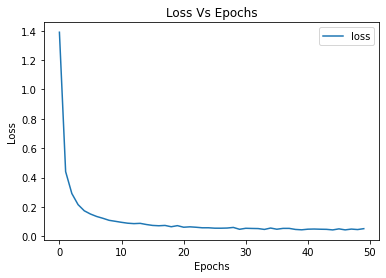

In [9]:
loss_plot = df.plot(y = 'loss', title = 'Loss Vs Epochs', legend = True)
loss_plot.set(xlabel = "Epochs", ylabel = "Loss");

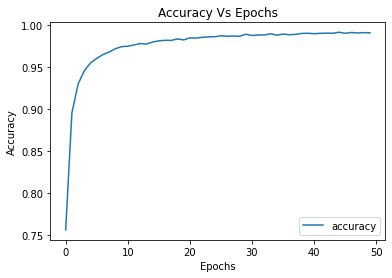

In [10]:
accuracy_plot = df.plot(y = 'accuracy', title = 'Accuracy Vs Epochs', legend = True)
accuracy_plot.set(xlabel = "Epochs", ylabel = "Accuracy");

***
### Prediction

Let's predict a few randomly selected images from the test dataset.

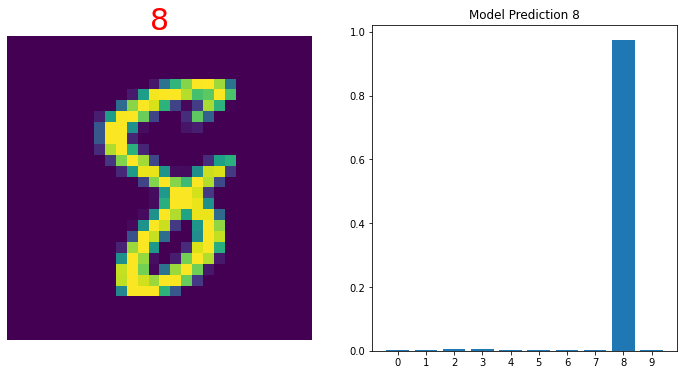

In [11]:
random_index = np.random.choice(x_test.shape[0])
image = x_test[random_index,:]
label = y_test[random_index]

predictions = model.predict(image[np.newaxis, :,:])

fig, axes = plt.subplots(1, 2, figsize = (12, 6))
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title(label, fontsize = 30, color = 'red')
axes[1].bar(np.arange(predictions.shape[1]),predictions.squeeze())
axes[1].set_xticks(np.arange(predictions.shape[1]))
axes[1].set_title('Model Prediction {}'.format(np.argmax(predictions), color = 'red', fontsize = 30))
plt.show()